# CNN for Digit Recognition

## 1. load data

In [22]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split


digit = load_digits()

data_x = digit.data
data_y = digit.target


x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

## 2. data preprocess

In [23]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 8, 8
input_shape = (img_rows, img_cols)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (1437, 64)
y_train shape: (1437,)
1437 train samples
360 test samples


## 3. CNN model

In [24]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Embedding(20,
                    30,
                    input_length=64))
model.add(Dropout(0.2))

model.add(Conv1D(32, kernel_size=3,
                 activation='relu'))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


## 4. train & test

In [25]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 1437 samples, validate on 360 samples
Epoch 1/12
1437/1437 [==============================] - 1s - loss: 2.3027 - acc: 0.0905 - val_loss: 2.3031 - val_acc: 0.0944
Epoch 2/12
1437/1437 [==============================] - 0s - loss: 2.3027 - acc: 0.0905 - val_loss: 2.3031 - val_acc: 0.0944
Epoch 3/12
1437/1437 [==============================] - 0s - loss: 2.3025 - acc: 0.1030 - val_loss: 2.3035 - val_acc: 0.0778
Epoch 4/12
1437/1437 [==============================] - 0s - loss: 2.3026 - acc: 0.0919 - val_loss: 2.3037 - val_acc: 0.0778
Epoch 5/12
1437/1437 [==============================] - 0s - loss: 2.3024 - acc: 0.1058 - val_loss: 2.3040 - val_acc: 0.0778
Epoch 6/12
1437/1437 [==============================] - 0s - loss: 2.3022 - acc: 0.1093 - val_loss: 2.3042 - val_acc: 0.0778
Epoch 7/12
1437/1437 [==============================] - 0s - loss: 2.3023 - acc: 0.1044 - val_loss: 2.3045 - val_acc: 0.0778
Epoch 8/12
1437/1437 [==============================] - 0s - loss: 2.3023 - ac

In [26]:
import numpy as np
# Convert one-hot to index
y_pred = np.argmax(model.predict(x_train), axis=1)

In [17]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## 5. model visualize

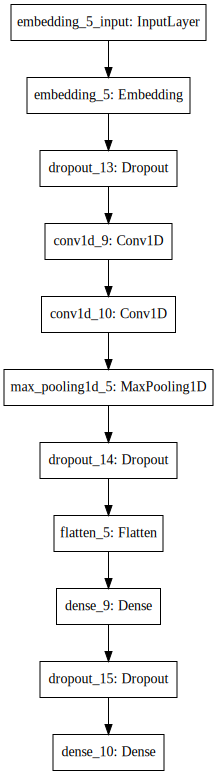

In [27]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))